NAME: Bhavik Ransubhe

CLASS : B.E ( B ) COMP

ROLL NO: 41261

CASE STUDY 1: analysis and cross-validation using multivariate logistic regression model on diabaties dataset.

In [1]:
#Importing pandas and loading the dataset
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=1, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
feature_cols = ['pregnant','insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = pima[feature_cols]
# Target variable
y = pima.label
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\bhavi\.Origin\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("confusion Matrix:\n",cnf_matrix)

confusion Matrix:
 [[120  11]
 [ 26  35]]


In [5]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.57      0.65        61
           0       0.82      0.92      0.87       131

    accuracy                           0.81       192
   macro avg       0.79      0.74      0.76       192
weighted avg       0.80      0.81      0.80       192



In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7608695652173914
Recall: 0.5737704918032787


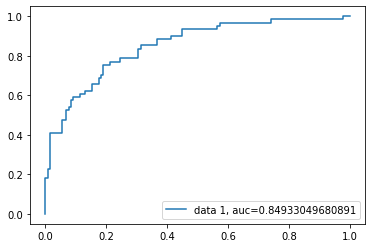

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()